In [26]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.graph_objects as go

filename_1d = "..\\data\\moex\\SBER_200101_240530.csv"
filename_1h = "..\\data\\moex\\SBER_240205_240603.csv"

dtype={
    '<TICKER>': 'string',
    '<PER>': 'string',
    '<DATE>': 'string',
    '<TIME>': 'string',
    '<OPEN>': 'float',
    '<HIGH>': 'float',
    '<LOW>': 'float',
    '<CLOSE>': 'float',
    '<VOLUME>': 'float',
}

df = pd.read_csv(filename_1d, delimiter=";", decimal=".", dtype=dtype)
df['timestamp'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%y%m%d %H%M%S')
df.drop(['<DATE>', '<TIME>', '<PER>', '<TICKER>'], axis=1, inplace=True)
df.set_index('timestamp', inplace=True, drop=False)
df.rename(columns= {'<OPEN>' : 'open', '<HIGH>' : 'high', '<LOW>' : 'low', '<CLOSE>' : 'close', '<VOL>' : 'volume'}, inplace=True)
df



,open,high,low,close,volume,timestamp
timestamp,,,,,,
2020-01-03,255.97,258.19,253.70,255.00,35824160,2020-01-03
2020-01-06,254.75,254.84,251.40,253.90,22327940,2020-01-06
2020-01-08,253.62,259.15,253.03,259.15,40736030,2020-01-08
2020-01-09,259.41,261.76,257.01,257.99,38196300,2020-01-09
2020-01-10,257.91,259.25,256.88,258.19,18841650,2020-01-10
...,...,...,...,...,...,...
2024-05-27,321.08,321.95,315.50,317.09,45678990,2024-05-27
2024-05-28,317.49,320.90,315.82,318.22,30148450,2024-05-28
2024-05-29,318.40,320.40,315.92,320.38,22961680,2024-05-29


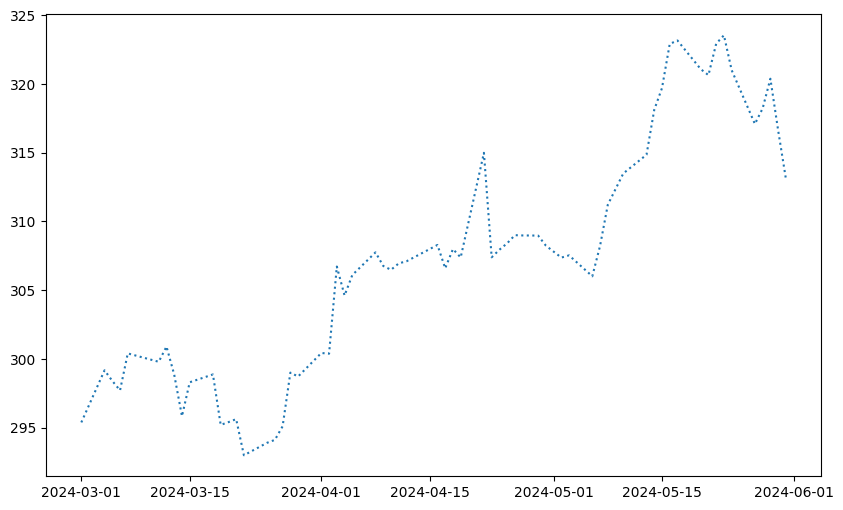

In [37]:

plt.figure(figsize=(10, 6))

#plt.plot(df['open'], '-', label='open')
plt.plot(df[datetime(2024, 3, 1):]['close'], ':', label='close')

plt.show()


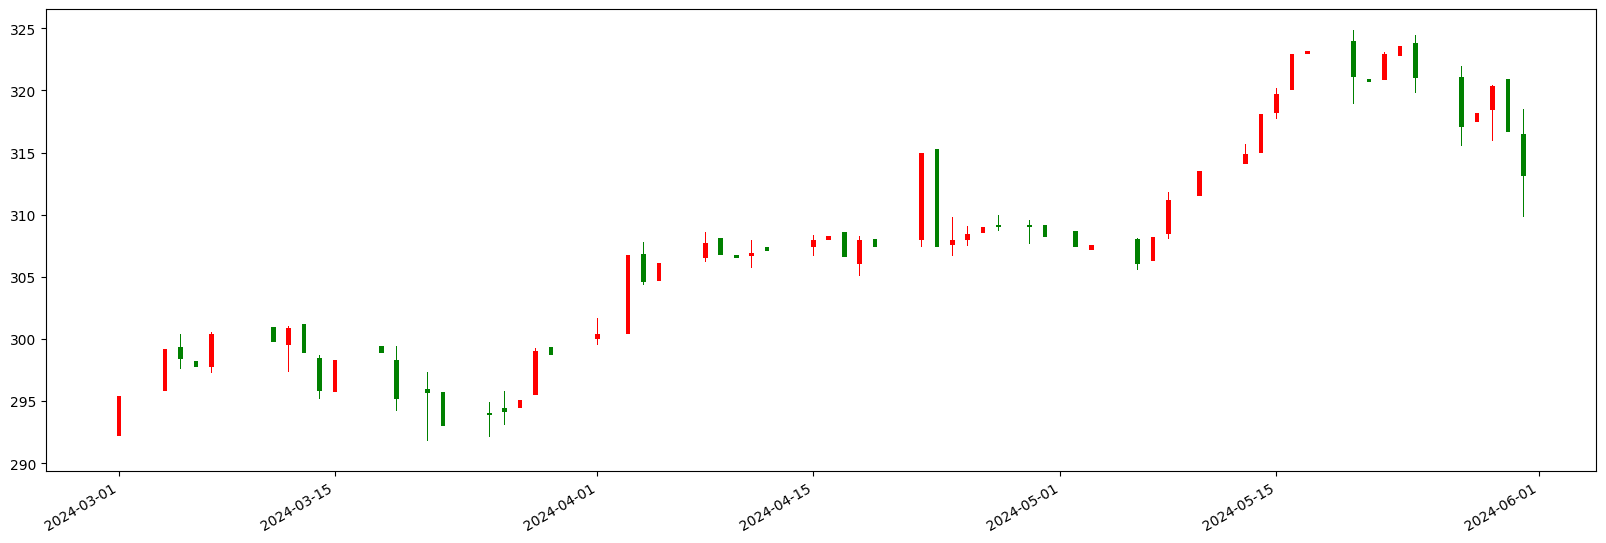

In [36]:
# https://www.geeksforgeeks.org/how-to-create-a-candlestick-chart-in-matplotlib/
plt.figure(figsize=(20, 6)) 
dt = df[datetime(2024, 3, 1):]

up = dt[dt.close >= dt.open] 
down = dt[dt.close < dt.open]
col1 = 'red'
col2 = 'green'

width = .3
width2 = .03

plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1) 
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1) 
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1) 

plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2) 
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2) 
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2) 

plt.xticks(rotation=30, ha='right') 

plt.show() 

#fig = go.Figure(data=go.Candlestick(x=dt['timestamp'],
#                    open=dt['open'],
#                    high=dt['high'],
#                    low=dt['low'],
#                    close=dt['close']), layout=go.Layout())
#fig.show()
